In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 📂 Load the data
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [3]:
# 👁️‍🗨️ Quick view
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# 🧹 Data Preprocessing
df.rename(columns={'Genre': 'Gender', 'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)
df_encoded = df.copy()
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})

In [5]:
# 🎯 Features for clustering
X = df_encoded[['Age', 'Annual_Income', 'Spending_Score']]

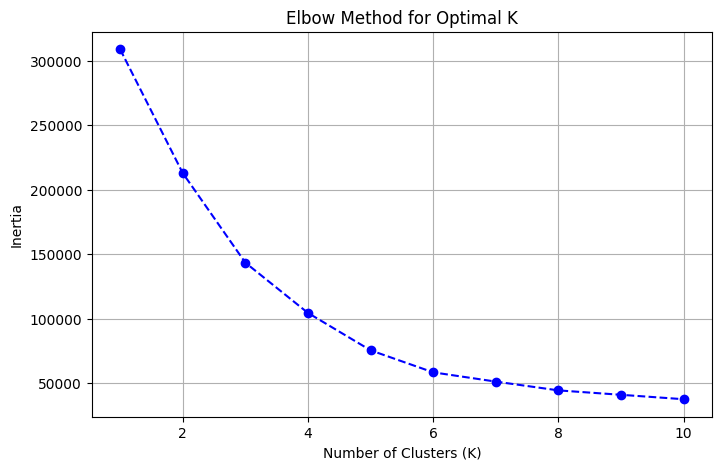

In [6]:
# 📉 Elbow Method to find optimal K
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [7]:
# ✅ Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

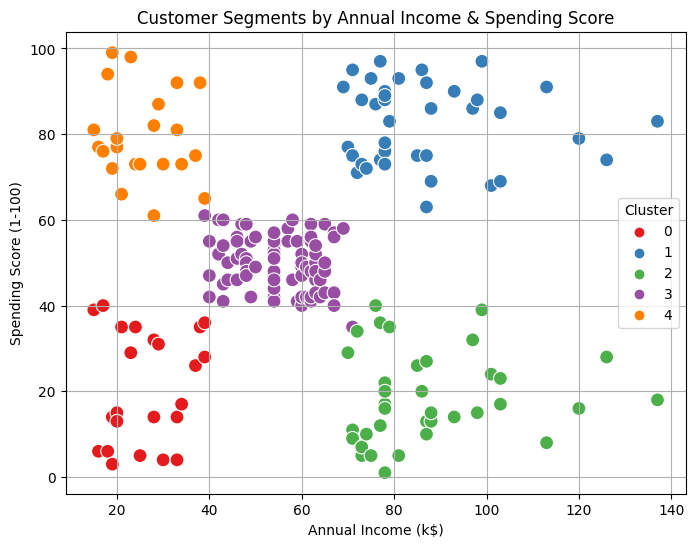

In [8]:
# 📊 2D Cluster Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Cluster', palette='Set1', s=100)
plt.title('Customer Segments by Annual Income & Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

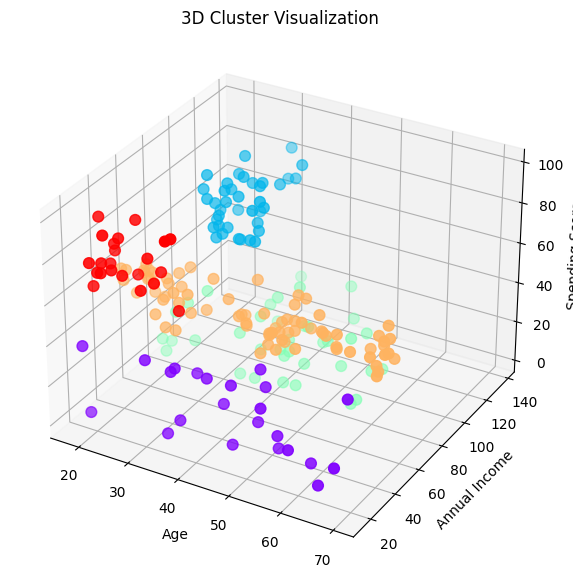

In [9]:
# 🔍 3D Cluster Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual_Income'], df['Spending_Score'], c=df['Cluster'], cmap='rainbow', s=60)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.set_title('3D Cluster Visualization')
plt.show()

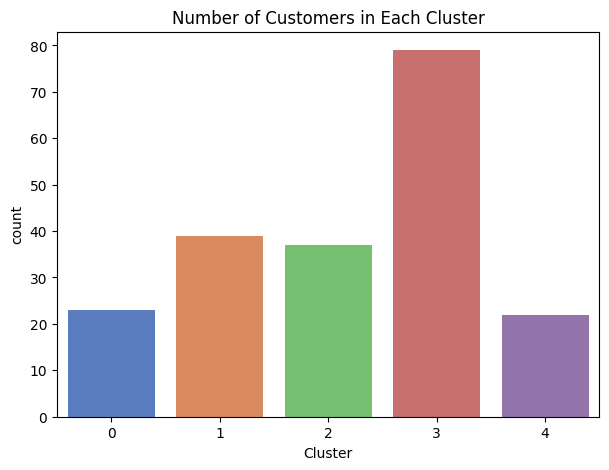

In [10]:
# 💠 Cluster Distribution
plt.figure(figsize=(7,5))
sns.countplot(x='Cluster', data=df, palette='muted')
plt.title('Number of Customers in Each Cluster')
plt.show()

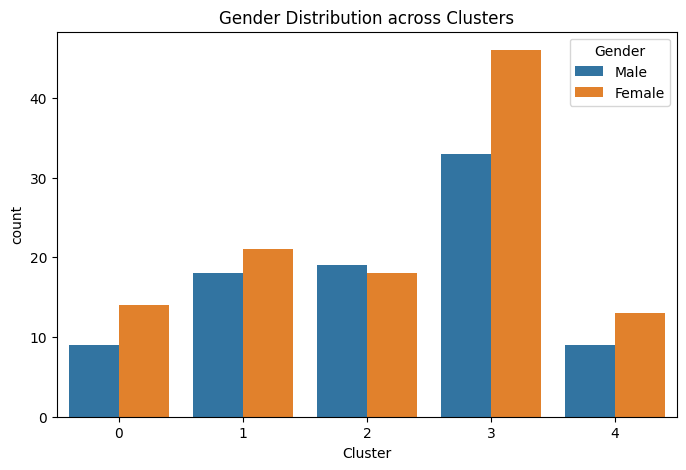

In [11]:
# 👨‍🦱 Gender Distribution by Cluster
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', hue='Gender', data=df)
plt.title('Gender Distribution across Clusters')
plt.show()

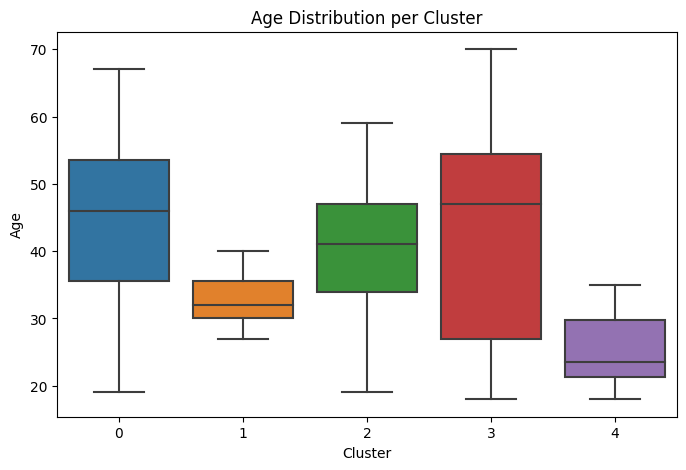

In [12]:
# 📊 Age vs Cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster', y='Age', data=df)
plt.title('Age Distribution per Cluster')
plt.show()

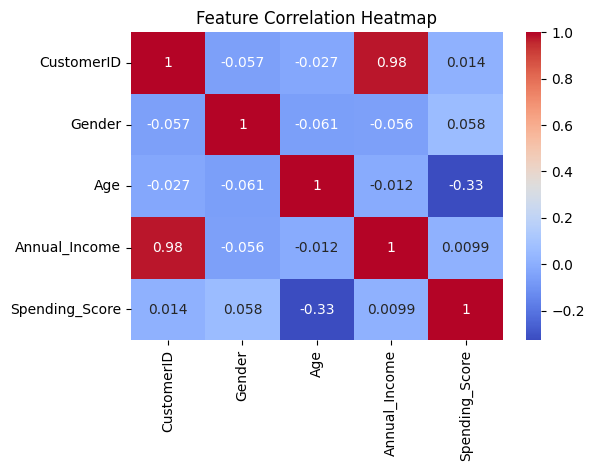

In [13]:
# 🔥 Heatmap of Feature Correlations
plt.figure(figsize=(6,4))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

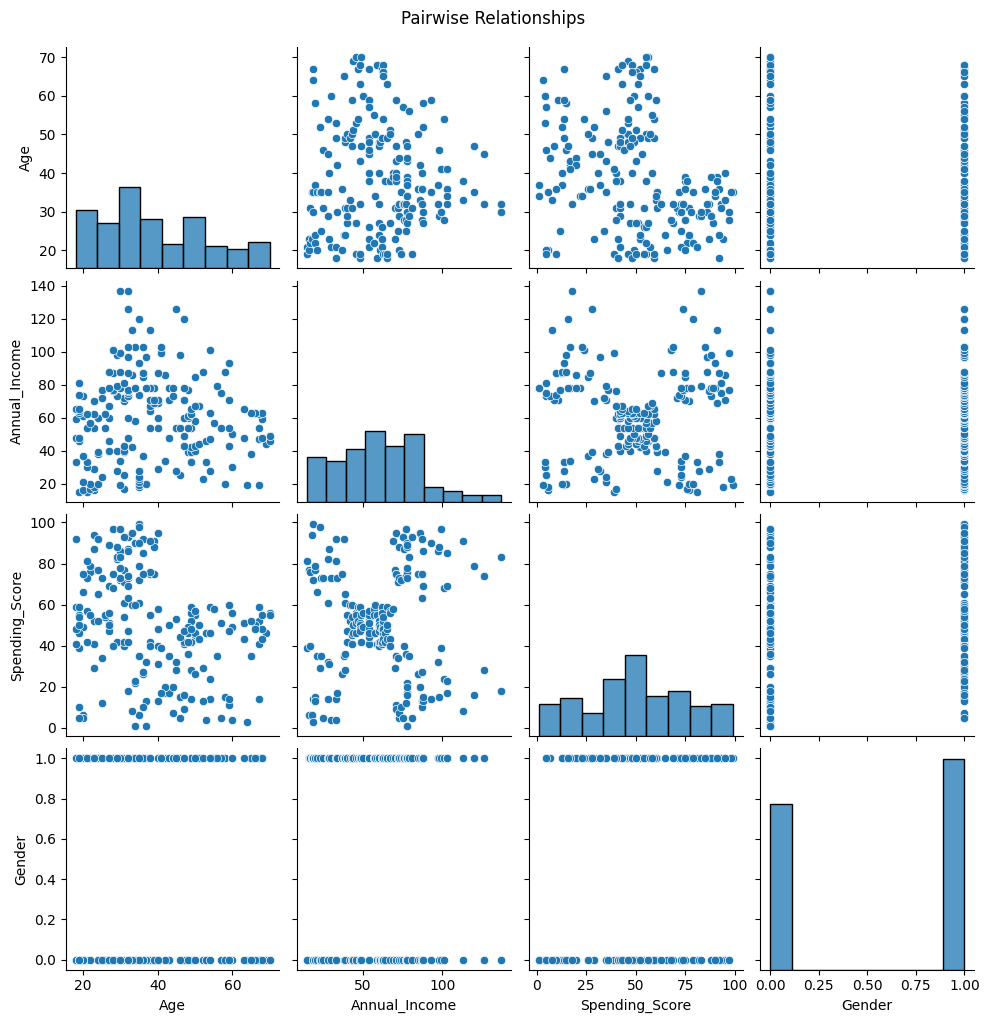

In [14]:
# 🤝 Pairplot for relationship insights
sns.pairplot(df_encoded[['Age', 'Annual_Income', 'Spending_Score', 'Gender']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

In [15]:
# 📋 Cluster Summary
cluster_summary = df.groupby('Cluster')[['Age', 'Annual_Income', 'Spending_Score']].mean()
print("📌 Cluster Summary (Means):")
print(cluster_summary)

📌 Cluster Summary (Means):
               Age  Annual_Income  Spending_Score
Cluster                                          
0        45.217391      26.304348       20.913043
1        32.692308      86.538462       82.128205
2        40.324324      87.432432       18.189189
3        43.126582      54.822785       49.835443
4        25.272727      25.727273       79.363636


In [16]:
# 📤 Save clustered data
df.to_csv('clustered_customers.csv', index=False)
print("✅ Clustered data saved as 'clustered_customers.csv'")

✅ Clustered data saved as 'clustered_customers.csv'
